## Observations and Insights 

In [1]:
#%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(len(mouse_metadata))
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results, on='Mouse ID', how = 'inner')
# Display the data table for preview

combined_df.head()

print(len(combined_df))

249
1893


In [2]:
# Checking the number of mice.
num_mice = combined_df['Mouse ID'].value_counts()
len(num_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Size of orginal DF= 1892, Size of new DF 1888

#duplicated_mice = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'])]

duplicated_mice = combined_df.duplicated(subset=['Mouse ID','Timepoint'])
duplicated_mice 



0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_df = combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(mouse_study_df)
num_mice

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen
regimens = mouse_study_df['Drug Regimen'].unique()
print(regimens)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen = mouse_study_df.groupby(["Drug Regimen"])

drug_mean = drug_regimen['Tumor Volume (mm3)'].mean()
drug_median = drug_regimen['Tumor Volume (mm3)'].median()
drug_var = drug_regimen['Tumor Volume (mm3)'].var()
drug_std = drug_regimen['Tumor Volume (mm3)'].std()
drug_sem = drug_regimen['Tumor Volume (mm3)'].sem()

data = {
    'Mean': drug_mean,
    'Median':drug_median,
    'Variance' : drug_var,
    'Standard Deviation': drug_std,
    'SEM': drug_sem
}

summary_df = pd.DataFrame(data)
summary_df

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate = drug_regimen['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
summary_aggregate



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


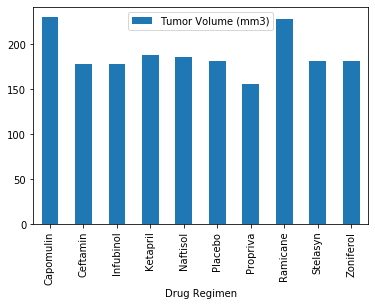

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_drug_test =drug_regimen['Tumor Volume (mm3)'].count()
data_bar:{
    'Drug Regimen': regimens,
    'Number of Measurments': num_drug_test
}
bar_pd_df = pd.DataFrame(num_drug_test)
bar_pd_df.plot.bar()
print(drug_regimen)
pd.DataFrame(drug_regimen.count())
#ax =  mouse_study_df.plot.bar(x='Drug Regimen',y = 'Tumor Volume (mm3)', rot=90)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


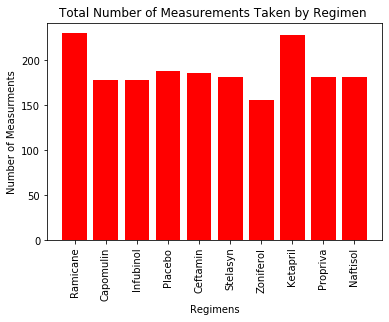

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


#The tick are wrong
num_regimen = drug_regimen['Mouse ID'].count()
plt.bar(regimens, num_regimen,color ='r')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Total Number of Measurements Taken by Regimen ')
plt.xlabel('Regimens')
plt.ylabel('Number of Measurments')
print(num_regimen)

        Mouse ID
Sex             
Female       124
Male         125


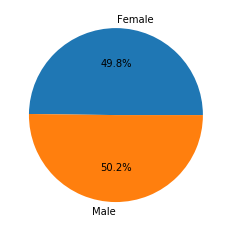

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Female = 930 Male = 958
#pandas.DataFrame.plot.pie

#pie_pandas = mouse_study_df['Sex'].value_counts(normalize = True)
#plt.pie(pie_pandas,labels = pie_pandas.index,autopct="%1.1f%%",startangle = 90)


sex_df = mouse_study_df.loc[:,['Mouse ID','Sex']] #1888

#DataFrame with Uniques ID and Sex Column
unique_sex_id = sex_df.drop_duplicates(subset='Mouse ID')

#DataFrame Number ofsex
num_sex = unique_sex_id.groupby('Sex').count()
labels = num_sex.index


plot_pandas = plt.pie(num_sex['Mouse ID'],labels = labels,autopct="%1.1f%%")
print(num_sex)

[124 125]


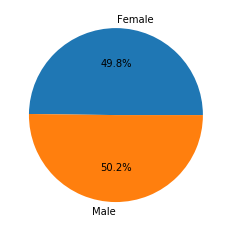

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
array_sex = np.array(num_sex['Mouse ID'])

plot_py = plt.pie(array_sex,labels = labels,autopct="%1.1f%%")

print(array_sex)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
